In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
from collections import Counter
warnings.filterwarnings("ignore")

In [33]:
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('eda_dataset.csv')
df.head(10)

,Unnamed: 0,VIN,brand,model,trim,manufature_year,mileage,MPG_city,MPG_highway,engine_capacity,...,fuel_type,exterior_color,interior_color,accidents,owners,car_usage_type,price,car_age,area,state
0,0,JM3KE4DYXF0531692,Mazda,CX-5,Grand Touring AWD Automatic,2015,52488,24,30,2.5,...,Gas,White,Beige,0,2,Personal use,22999,7,East Greenwich,RI
1,1,WBA53BJ09MCG04416,BMW,5,540i RWD,2021,16065,25,32,3.0,...,Gas,Black,Black,0,0,Personal use,64300,1,D'Iberville,MS
2,2,1N4AA6AP0HC360935,Nissan,Maxima,SR,2017,76347,21,30,3.5,...,Gas,Gray,Black,0,2,Personal use,22990,5,Costa Mesa,CA
3,3,1FTEW1E55JKC28614,Ford,F-150,XL SuperCrew 5.5' Box 4WD,2018,120532,18,23,5.0,...,Gas,White,Gray,0,1,Personal use,21900,4,Plano,TX
4,4,JN8AT2MV6KW378051,Nissan,Rogue,SV AWD,2019,152624,25,32,2.5,...,Gas,Gray,Black,0,1,Fleet use,13900,3,Atlantic Highlands,NJ
5,5,1N4AL3APXFC228979,Nissan,Altima,2.5 SV,2015,165626,27,38,2.5,...,Gas,Gray,Gray,0,3,Personal use,7500,7,San Antonio,TX
6,6,3GCUKSEC9HG338403,Chevrolet,Silverado,LTZ Crew Cab Short Box 4WD,2017,217225,16,22,5.3,...,Gas,Black,Black,1,1,Personal use,21622,5,Lubbock,TX
7,7,5YFEPRAE2LP096935,Toyota,Corolla,LE CVT,2020,21467,30,38,1.8,...,Gas,White,Black,1,2,Personal use,19300,2,Boise,ID
8,8,1FTEX1EB1JKE87149,Ford,F-150,XL SuperCab 6.5' Box 4WD,2018,169857,18,23,3.3,...,Gas,White,Gray,0,1,Fleet use,15990,4,Dallas,TX
9,9,1FTEW1E51JFE29029,Ford,F-150,XLT SuperCrew 5.5' Box 4WD,2018,96959,18,23,5.0,...,Gas,Black,Gray,0,1,Personal use,26990,4,Grand Rapids,MI


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df=df.drop(['Unnamed: 0'],axis=1)

In [7]:
df.head()

,VIN,brand,model,trim,manufature_year,mileage,MPG_city,MPG_highway,engine_capacity,transmission,drive_type,fuel_type,exterior_color,interior_color,accidents,owners,car_usage_type,price,car_age,area,state
0,JM3KE4DYXF0531692,Mazda,CX-5,Grand Touring AWD Automatic,2015,52488,24,30,2.5,Automatic,AWD,Gas,White,Beige,0,2,Personal use,22999,7,East Greenwich,RI
1,WBA53BJ09MCG04416,BMW,5,540i RWD,2021,16065,25,32,3.0,Automatic,RWD,Gas,Black,Black,0,0,Personal use,64300,1,D'Iberville,MS
2,1N4AA6AP0HC360935,Nissan,Maxima,SR,2017,76347,21,30,3.5,Automatic,FWD,Gas,Gray,Black,0,2,Personal use,22990,5,Costa Mesa,CA
3,1FTEW1E55JKC28614,Ford,F-150,XL SuperCrew 5.5' Box 4WD,2018,120532,18,23,5.0,Automatic,4WD,Gas,White,Gray,0,1,Personal use,21900,4,Plano,TX
4,JN8AT2MV6KW378051,Nissan,Rogue,SV AWD,2019,152624,25,32,2.5,Automatic,AWD,Gas,Gray,Black,0,1,Fleet use,13900,3,Atlantic Highlands,NJ


In [8]:
df.shape

(9818, 21)

There are totally 9818 used car listings with 21 columns in the datasets. The main columns include:

1. VIN : Vehicle Identification number which is unique    
2. brand: the company the car belongs to(automaker)
3. model: model of the vehicle
4. trim: more details of the vehicle model
5. manufacture_year : Year the vehicle was manufactured
6. mileage: mileage of the car
7. mpg_city: vehicle efficiency running in city conditions, miles per gallon
8. mpg_hwy: vehicle efficiency running in highway conditions, miles per gallon
9. engine_capacity: engine specification (How many litre engine)
10. transmission: automatic or manual transmission type
11. drive_type: drive type of the car
12. fuel_type: fuel type of the car, gasolin/diesel/hybrid/electric etc.
13. exterior_color: color of the car
14. interior_color: inside color of the car
15. accidents: contains data regarding accidents that happened to the car
16. owners: data about the number of previous owners
17. car_usage_type : contains details weather it was a personal vehicle or fleet vehicle used for rental purposes
18. Price : Price at which the car is being sold
19. car_age : Age of the car
20. area: current city where the car is located
21. state: current state where the car is located

In [11]:
df.isna().sum()

VIN                0
brand              0
model              0
trim               0
manufature_year    0
mileage            0
MPG_city           0
MPG_highway        0
engine_capacity    0
transmission       0
drive_type         0
fuel_type          0
exterior_color     0
interior_color     0
accidents          0
owners             0
car_usage_type     0
price              0
car_age            0
area               0
state              0
dtype: int64

In [14]:
df.describe()

,manufature_year,mileage,engine_capacity,accidents,owners,price,car_age
count,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000
mean,2017.561316,69295.185170,2.974180,0.214097,1.611937,26210.886942,4.438684
std,3.163012,45663.410206,1.221414,0.494852,0.918025,12172.286351,3.163012
min,1997.000000,17.000000,1.000000,0.000000,0.000000,1991.000000,0.000000
25%,2017.000000,35161.500000,2.000000,0.000000,1.000000,18000.000000,3.000000
50%,2019.000000,59234.000000,2.500000,0.000000,1.000000,24000.000000,3.000000
75%,2019.000000,94894.250000,3.600000,0.000000,2.000000,33089.500000,5.000000
max,2022.000000,356955.000000,6.400000,4.000000,10.000000,229883.000000,25.000000


We have vehicles years ranging from 1997 - 2022


In [15]:
df.dtypes

VIN                 object
brand               object
model               object
trim                object
manufature_year      int64
mileage              int64
MPG_city            object
MPG_highway         object
engine_capacity    float64
transmission        object
drive_type          object
fuel_type           object
exterior_color      object
interior_color      object
accidents            int64
owners               int64
car_usage_type      object
price                int64
car_age              int64
area                object
state               object
dtype: object

### Looking at the coverage of data and the number of vehicles from each state

In [20]:
df['state'].value_counts()

 TX    2053
 FL    1415
 CA    1186
 NC     438
 GA     360
 VA     339
 NJ     269
 OH     259
 IL     255
 AZ     253
 TN     248
 NY     246
 PA     227
 IN     225
 WA     181
 MI     149
 MO     139
 CO     134
 MD     111
 AL     109
 MA     106
 OR      99
 KY      98
 SC      87
 NV      83
 ID      83
 CT      54
 OK      53
 WI      51
 MN      51
 IA      47
 LA      46
 AR      44
 UT      43
 KS      42
 NM      42
 NE      27
 NH      27
 HI      23
 MT      21
 ND      21
 MS      18
 WV      13
 WY       9
 RI       9
 SD       9
 DE       7
 ME       5
 AK       4
Name: state, dtype: int64

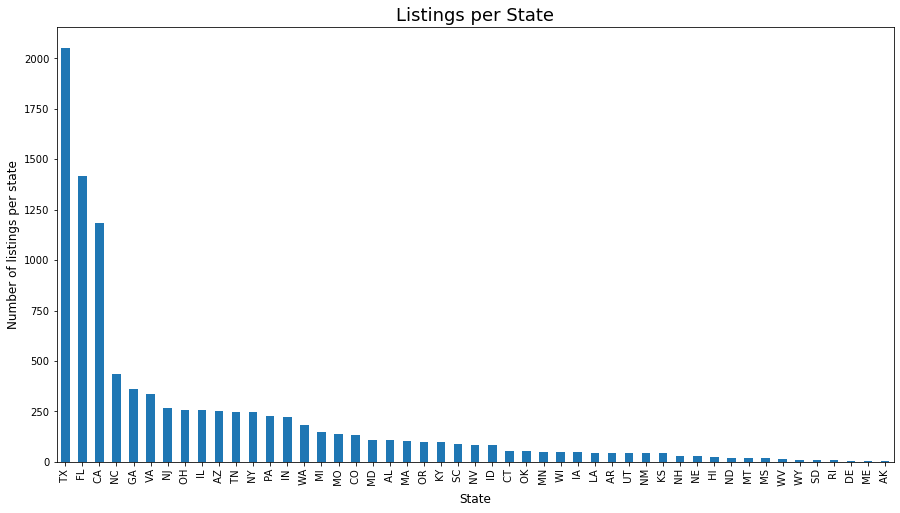

In [16]:
df.groupby(['state'])['manufature_year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings per state', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.title('Listings per State', fontsize=18)
plt.show()

### Findings:
1. From this we can clearly see that texas stands in the first position in the number of listings which is more than 2053 and next is florida with around 1415 car listings and california has 1186. The least number of cars being posted online from the state of Alaska which is just 4.
2. We can clearly see that these three states have highest resale listings because we know that these states are highly populated when compared to other states. So it used cars have correlation with population.


### Vehicle listings per automaker

In [21]:
df['brand'].value_counts()

Ford             2713
Chevrolet        1346
Toyota            860
Jeep              823
Nissan            814
Ram               431
Mercedes-Benz     356
Honda             352
Dodge             298
Hyundai           248
Kia               234
BMW               223
GMC               192
Lexus             154
Volkswagen        142
Chrysler          107
Cadillac           68
Buick              64
INFINITI           54
Lincoln            47
Subaru             46
Audi               40
Mazda              28
Volvo              27
Land               24
Acura              23
Porsche            19
Mitsubishi         15
Scion              12
Maserati           10
HUMMER              9
Jaguar              7
MINI                5
Mercury             4
Suzuki              4
Tesla               4
Ferrari             3
smart               3
FIAT                2
Karma               2
Bentley             2
Saab                1
Alfa                1
Isuzu               1
Name: brand, dtype: int64

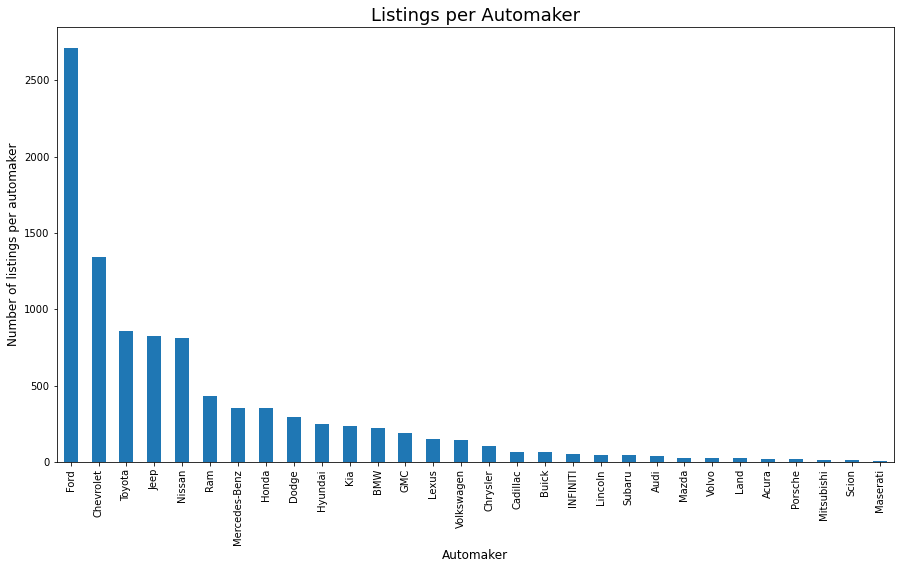

In [23]:
## Only listing the top 30 car makers for better visualization and aslo the rest does not have significant number of resale cars
df.groupby(['brand'])['manufature_year'].count().sort_values(ascending=False).head(30).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings per automaker', fontsize=12)
plt.xlabel('Automaker', fontsize=12)
plt.title('Listings per Automaker', fontsize=18)
plt.show()

In [24]:
len(df[(df.brand=='Ford') | (df.brand=='Chevrolet')|(df.brand=='Toyota')|(df.brand=='Jeep')|(df.brand=='Nissan')])/len(df)

0.66775310653901

### Findings:

Ford is the domimant brand on the used car market. And Chevrolet, Toyota, Jeep, Nissan are another top 4 makers. Totally they account for about 67% of the used car listings.

Ford and Chevrolet are two US brands that lots of consumers like to purchase (maybe because of US brand, brand loyalty, etc). Toyota and Nissan are two Japanese brands which represent for cost-benefit efficient cars and their used cars works very well after long-time use. However, it is surprising to see that Honda only ranks 8th in the used car market though in general it is sought to be one of the most reliable brands.

### Cars sold on private website are mostly accidental?

In [25]:
df['accidents'].value_counts()

0    8037
1    1509
2     229
3      37
4       6
Name: accidents, dtype: int64

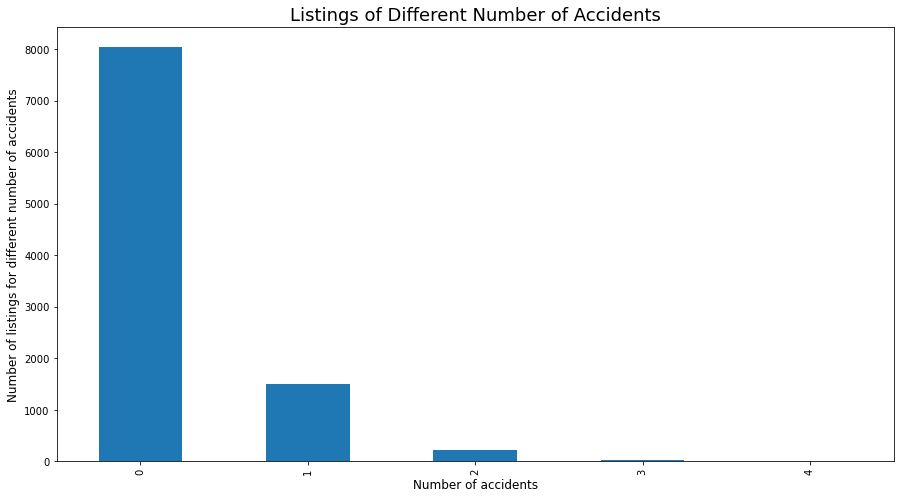

In [26]:
df.groupby(['accidents'])['manufature_year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings for different number of accidents', fontsize=12)
plt.xlabel('Number of accidents', fontsize=12)
plt.title('Listings of Different Number of Accidents', fontsize=18)
plt.show()

### Mean price of cars according to their brands

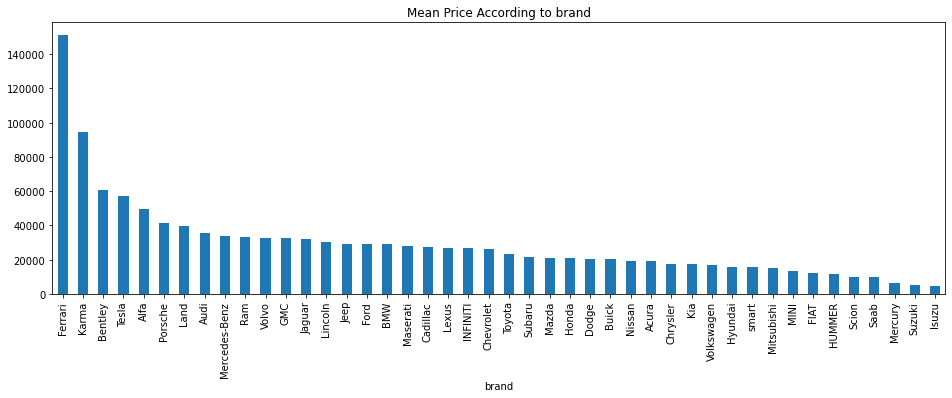

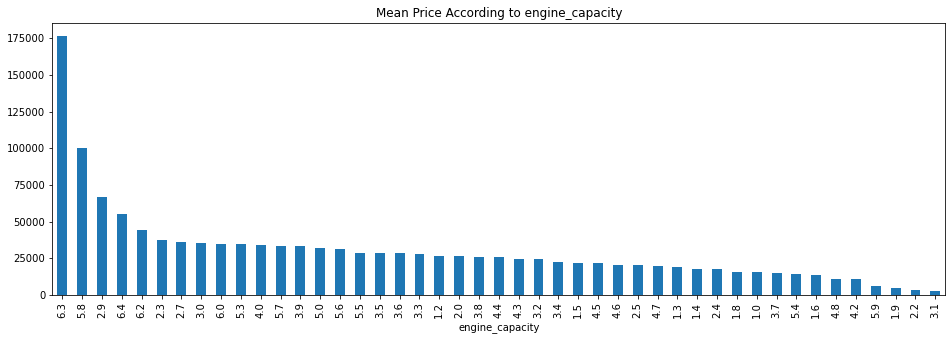

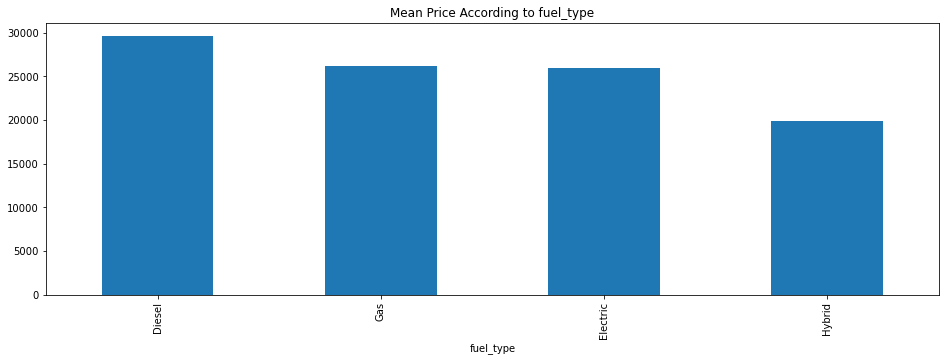

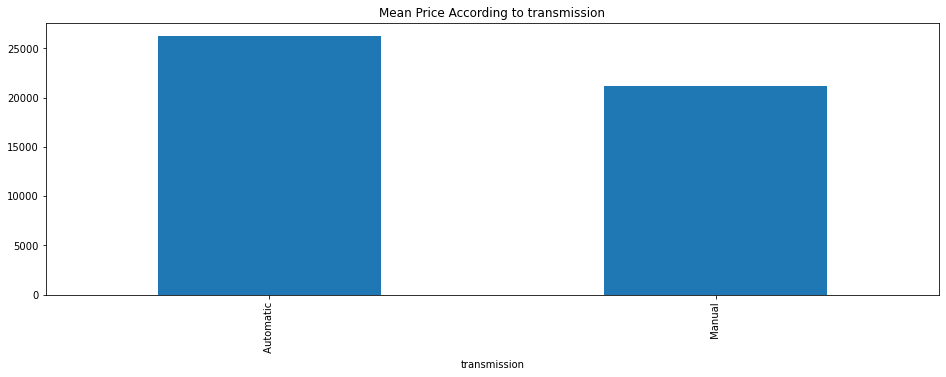

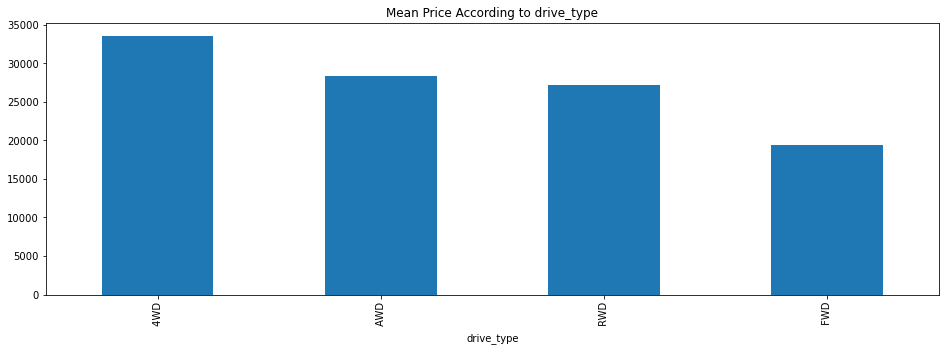

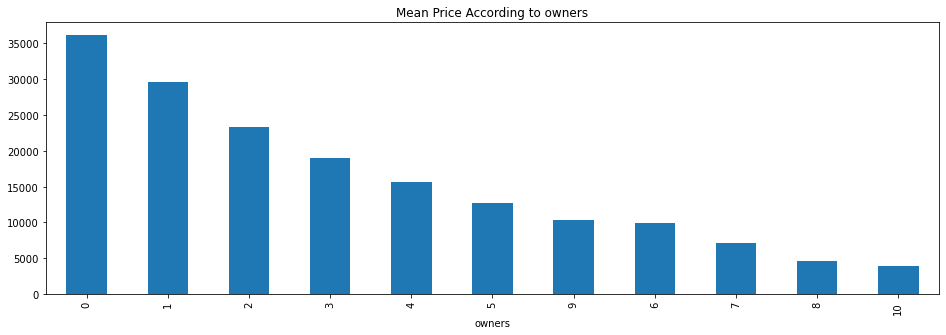

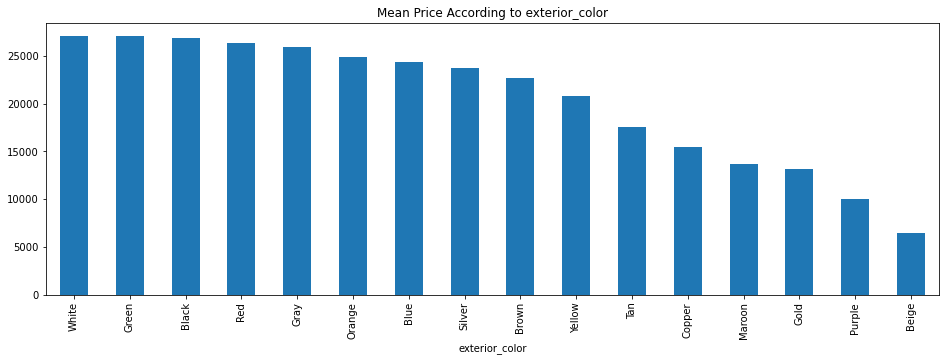

In [32]:
cols=["brand","engine_capacity","fuel_type","transmission","drive_type","owners","exterior_color"]
for i in cols:
    df.groupby(i)["price"].mean().sort_values(ascending=False).plot.bar(figsize=(16,5));
    plt.title("Mean Price According to " + str(i))
    plt.show();

### Checking for price distribution, since it is going to be our target variable

In [47]:
df['price'].describe()

count      9818.000000
mean      26210.886942
std       12172.286351
min        1991.000000
25%       18000.000000
50%       24000.000000
75%       33089.500000
max      229883.000000
Name: price, dtype: float64

<AxesSubplot:>

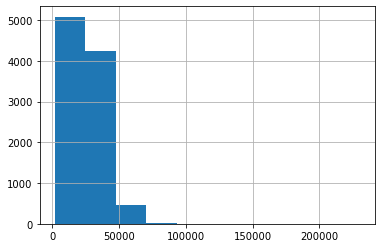

In [28]:
df["price"].hist()

Looks right skewed. So we do normal distribution.

(array([1.400e+01, 5.600e+01, 2.410e+02, 9.460e+02, 2.395e+03, 3.928e+03,
        2.071e+03, 1.550e+02, 1.000e+01, 2.000e+00]),
 array([ 7.59689444,  8.07173801,  8.54658157,  9.02142514,  9.49626871,
         9.97111228, 10.44595584, 10.92079941, 11.39564298, 11.87048655,
        12.34533011]),
 <BarContainer object of 10 artists>)

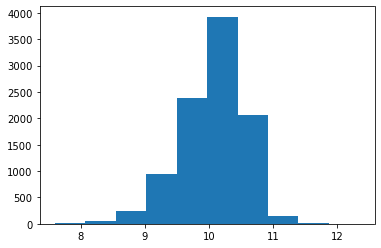

In [29]:
plt.hist(np.log1p(df["price"]))

### Label Encoding

In [34]:
df_test = df.drop(['MPG_city', 'MPG_highway'], axis=1)

In [35]:
categorical_columns = df_test.select_dtypes(['object']).columns

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [42]:
# from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder()
for col in df_test[categorical_columns]:
    df_test[col]= label_encoder.fit_transform(df_test[col])

In [43]:
df_test.head()

,VIN,brand,model,trim,manufature_year,mileage,engine_capacity,transmission,drive_type,fuel_type,exterior_color,interior_color,accidents,owners,car_usage_type,price,car_age,area,state
0,8606,28,49,449,2015,52488,2.5,0,1,2,14,0,0,2,1,22999,7,317,38
1,9492,3,9,176,2021,16065,3.0,0,3,2,1,1,0,0,1,64300,1,265,24
2,4392,32,165,1018,2017,76347,3.5,0,2,2,6,1,0,2,1,22990,5,251,4
3,2527,12,96,1358,2018,120532,5.0,0,0,2,14,4,0,1,1,21900,4,941,42
4,8708,32,221,1066,2019,152624,2.5,0,1,2,6,1,0,1,0,13900,3,48,30


In [44]:
df_test.corr()

,VIN,brand,model,trim,manufature_year,mileage,engine_capacity,transmission,drive_type,fuel_type,exterior_color,interior_color,accidents,owners,car_usage_type,price,car_age,area,state
VIN,1.000000,0.294829,0.156830,-0.262834,-0.057226,-0.029261,-0.264560,0.013345,0.358990,0.002915,-0.024709,-0.024449,0.012972,0.048485,-0.010942,-0.179534,0.057226,0.036181,-0.077521
brand,0.294829,1.000000,-0.134447,-0.204316,0.008716,-0.026117,-0.038758,0.030289,0.095468,-0.012657,-0.002151,-0.000694,0.031602,0.015496,0.007744,-0.080730,-0.008716,0.022699,-0.042215
model,0.156830,-0.134447,1.000000,0.190905,-0.035954,0.025492,0.074364,0.040734,-0.082305,-0.007705,0.025782,-0.044697,-0.025652,-0.000301,0.028997,0.123177,0.035954,0.005388,0.018585
trim,-0.262834,-0.204316,0.190905,1.000000,0.049864,0.007272,0.106509,0.001923,-0.243496,-0.011382,0.030885,0.160046,-0.050013,-0.076347,0.019215,0.133914,-0.049864,0.006904,0.039412
manufature_year,-0.057226,0.008716,-0.035954,0.049864,1.000000,-0.626468,-0.155311,-0.098341,-0.080103,-0.005532,0.006745,-0.123436,-0.158657,-0.541937,0.070612,0.526935,-1.000000,-0.008089,0.017850
mileage,-0.029261,-0.026117,0.025492,0.007272,-0.626468,1.000000,0.140592,0.010099,0.033392,0.012715,0.022355,0.135058,0.179561,0.395804,-0.111778,-0.554502,0.626468,-0.033296,0.025826
engine_capacity,-0.264560,-0.038758,0.074364,0.106509,-0.155311,0.140592,1.000000,-0.020541,-0.297685,0.003327,0.031221,0.056008,0.001967,0.042464,0.087199,0.319798,0.155311,-0.035427,0.089589
transmission,0.013345,0.030289,0.040734,0.001923,-0.098341,0.010099,-0.020541,1.000000,0.029531,0.003308,-0.013756,-0.004496,-0.018481,0.052250,0.007234,-0.046699,0.098341,0.017257,0.001798
drive_type,0.358990,0.095468,-0.082305,-0.243496,-0.080103,0.033392,-0.297685,0.029531,1.000000,0.043970,0.025185,-0.013470,0.066512,0.107878,-0.069954,-0.379289,0.080103,0.046767,-0.118304
fuel_type,0.002915,-0.012657,-0.007705,-0.011382,-0.005532,0.012715,0.003327,0.003308,0.043970,1.000000,-0.010577,0.014679,0.015414,0.009221,-0.003958,-0.034538,0.005532,0.000589,-0.024327


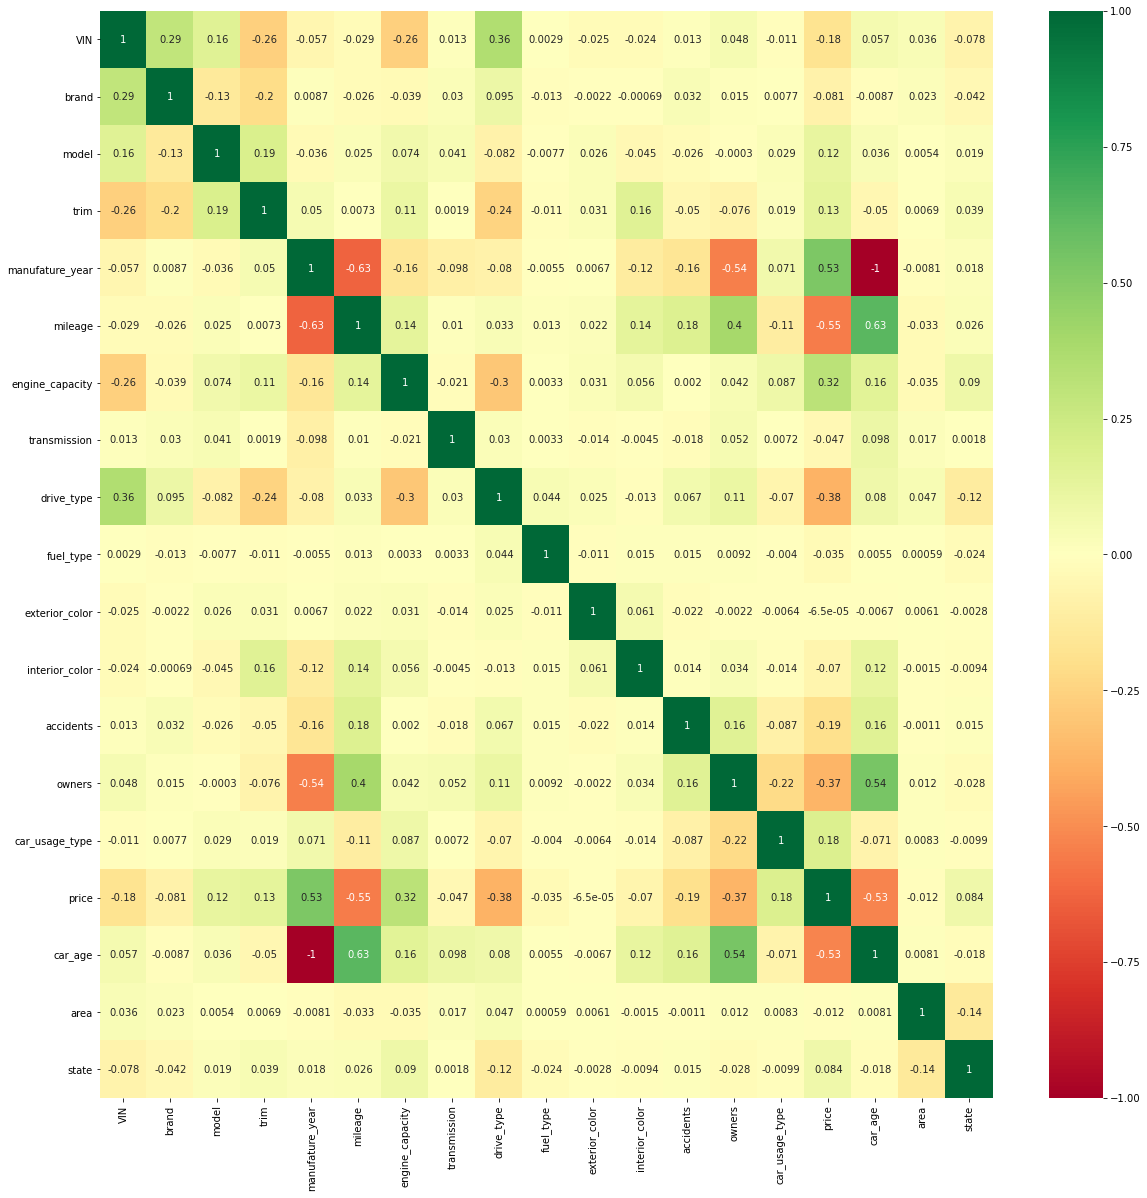

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
#get correlations of each features in dataset
corrmat = df_test.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_test[top_corr_features].corr(),annot=True,cmap="RdYlGn")